# COEN 140 Lab 9

In this lab, I implemented PCA using the MNIST dataset. I graphed the data based on using the first two principal component or using the first 3 principle components.

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sn

# Importing the data

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)
X = mnist["data"]

In [3]:
print(X.shape)

(70000, 784)


In [4]:
# getting only the first 2000 instances
data = X[:2000,:]
print(data.shape)

(2000, 784)


# Preprocessing Data

In [5]:
# preprocessing the data by subtracting the average of the data from each instance
data_mean = np.mean(data,axis = 0)
preprocessed_data = data - data_mean;
print(preprocessed_data.shape)

(2000, 784)


# Calculating the Covariance Matrix

In [6]:
covar_matrix = np.dot(preprocessed_data.T,preprocessed_data)/len(preprocessed_data)
print(covar_matrix.shape)

(784, 784)


# Calculating the eigenvalues and eigenvectors

In [7]:
eigenval,eigenvec = np.linalg.eig(covar_matrix)
print(eigenval.shape)
print(eigenvec.shape)

(784,)
(784, 784)


In [25]:
summation_eigenvalues = np.sum(eigenval)
first2_eigenval = eigenval[:2]
print("First 2 eigenvalues:", first2_eigenval)

first3_eigenval = eigenval[:3]
print("First 3 eigenvalues:", first3_eigenval)

first2_summation = np.sum(first2_eigenval)
variance2 = first2_summation/summation_eigenvalues
variance2 = variance2.real
print("Variance for the first 2 eigenvalues:", variance2)

first3_summation = np.sum(first3_eigenval)
variance3 = first3_summation/summation_eigenvalues
variance3 = variance3.real
print("Variance for the first 3 eigenvalues:", variance3)

First 2 eigenvalues: [338999.05064397+0.j 252673.22108496+0.j]
First 3 eigenvalues: [338999.05064397+0.j 252673.22108496+0.j 218909.62067798+0.j]
Variance for the first 2 eigenvalues: 0.17470154993273238
Variance for the first 3 eigenvalues: 0.23933843060972845


# Projecting the Data For the Principal Components

In [9]:
first_projection = np.matmul(eigenvec[:,0],preprocessed_data.T)
second_projection = np.matmul(eigenvec[:,1],preprocessed_data.T)
third_projection = np.matmul(eigenvec[:,2],preprocessed_data.T)

twoD_projections = [first_projection,second_projection]
twoD_projections = np.array(twoD_projections)
twoD_projections = twoD_projections.real
print(twoD_projections.shape)

threeD_projections = [first_projection,second_projection,third_projection]
threeD_projections = np.array(threeD_projections)
threeD_projections = threeD_projections.real
print(threeD_projections.shape)


(2, 2000)
(3, 2000)


# Creating the DataFrame with the Corresponding Labels for Each Instance

In [10]:
Y = mnist["target"]
Y = Y[:2000]
print(Y.shape)

(2000,)


In [11]:
data_withLabels = np.vstack((twoD_projections,Y)).T
print(data_withLabels.shape)

(2000, 3)


In [12]:
df = pd.DataFrame(data = data_withLabels, columns = ("1st PC","2nd PC", "Label"))
print(df.head())

    1st PC   2nd PC Label
0 -187.107  337.295     5
1  -1085.6   440.66     0
2  85.2131 -452.559     4
3  916.237  650.877     1
4  315.564 -690.962     9


# Plotting the 2D Graph

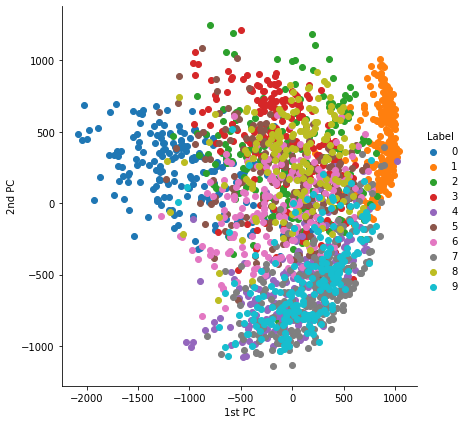

In [22]:
sn.FacetGrid(df, hue = 'Label', height = 6).map(plt.scatter,'1st PC','2nd PC').add_legend()
plt.show()

# Creating the DataFrame with the Corresponding Labels for Each Instance

In [14]:
data_withLabels = np.vstack((threeD_projections,Y)).T
print(data_withLabels.shape)

(2000, 4)


In [15]:
df = pd.DataFrame(data = data_withLabels, columns = ("1st PC","2nd PC","3rd PC","Label"))
print(df.head())

    1st PC   2nd PC   3rd PC Label
0 -187.107  337.295 -169.097     5
1  -1085.6   440.66  201.549     0
2  85.2131 -452.559 -185.614     4
3  916.237  650.877  66.3987     1
4  315.564 -690.962  79.0038     9


# Plotting the 3D graph

Text(0.5, 0, '3rd PC')

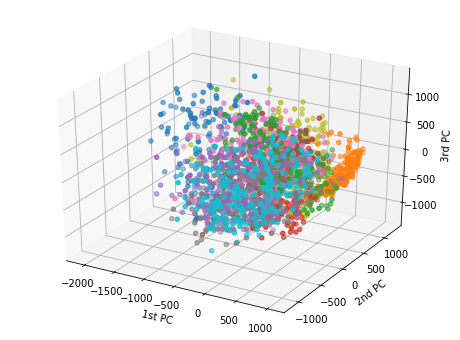

In [16]:
fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')

x1 = [[] for i in range(10)]
y1 = [[] for i in range(10)]
z1 = [[] for i in range(10)]

for i in range(len(threeD_projections[0])):
    x1[int(df["Label"][i])].append(threeD_projections[0][i])
    y1[int(df["Label"][i])].append(threeD_projections[1][i])
    z1[int(df["Label"][i])].append(threeD_projections[2][i])

for i in range(10):
    ax.scatter3D(x1[i],y1[i],z1[i])
ax.set_xlabel('1st PC')
ax.set_ylabel('2nd PC')
ax.set_zlabel('3rd PC')